## Business Understanding
Klasifikasi ini dilakukan untuk menentukan kualitas air apakah air tersebut aman untuk berbagai keperluan manusia. Dengan melakukan klasifikasi ini bisa memahami kondisi lingkungan air yang ada, melindungi kesehatan manusia, mematuhi standar dan regulasi yang berlaku.

## Data Understanding

  1. alumunium : unsur kimia digunakan untuk pemurnian air
  2. ammonia : merupakan hasil dari penguraian zat   organik oleh bakteri 
  3. arsenic : unsur kimia yang dapat menyebabkan masalah kesehatan
  4. barium : unsur kimia yang dapat menyebabkan gangguan sistem saraf manusia
  5. cadmium :  merupakan senyawa yang paling beracun dan mudah larut dalam air
  6. chloramine :  bahan utama yang digunakan dalam proses Khloronasi atau sebuh proses penghilangan kuman/bakteri/mikrobiologi di dalam air
  7. chromium : adalah elemen yang secara alamiah ditemukan dalam konsentrasi yang rendah 
  8. copper : unsur kimia yang membantu menghilangkan bakteri dan mengurangi kandungan logam berat lainnya dalam air
  9. flouride : penambahan secara terkontrol fluorida ke dalam penyediaan air publik untuk mengurangi kerusakan gigi
  10. bacteria : bakteri dalam air adalah bakteri yang secara alami ada di lingkungan air dan tidak menyebabkan penyakit
  11. viruses : peran virus digunakan dalam kematian mikroba
  12. lead : senyawa kimia yang mengandung unsur logam
  13. nitrates : bentuk umum kombinasi nitrogen yang terdapat di perairan 
  14. nitrites : bentuk umum kombinasi nitrogen yang terdapat di perairan
  15. mercury : air raksa yaitu bahan beracun yang dapat membahayakan organisme hidup
  16. perchlorate : senyawa yang mengacu pada ion didalam kandungan air
  17. radium : senyawa isotop radioaktif yang mengeluarkan radiasi alfa yang dapat merusak jaringan tubuh
  18. selenium : sebagai mikronutrien yang penting untuk organisme hidup
  19. silver : mengandung unsur perak digunakan untuk membunuh mikroorganisme yang berbahaya
  20. uranium : adalah senyawa radioaktif



In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt 

In [26]:
df = pd.read_csv('waterQuality.csv')

In [27]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [29]:


df.isna().sum()



aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

<Axes: >

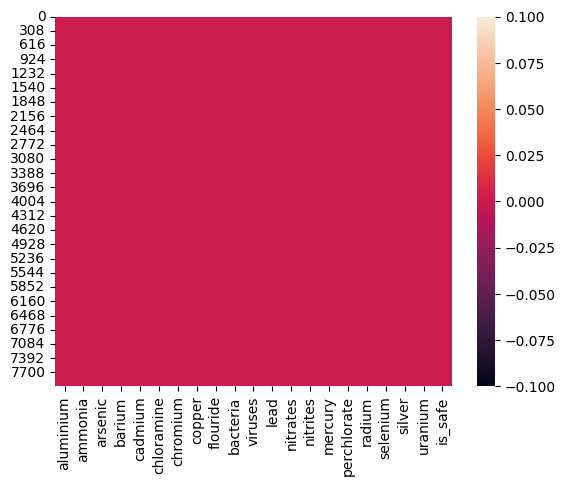

In [30]:


sns.heatmap(df.isnull())



In [31]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,...,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,14.274966,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,...,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673,0.114139
std,1.265145,8.879176,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,...,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904,0.318000
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.575000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.130000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


<Axes: >

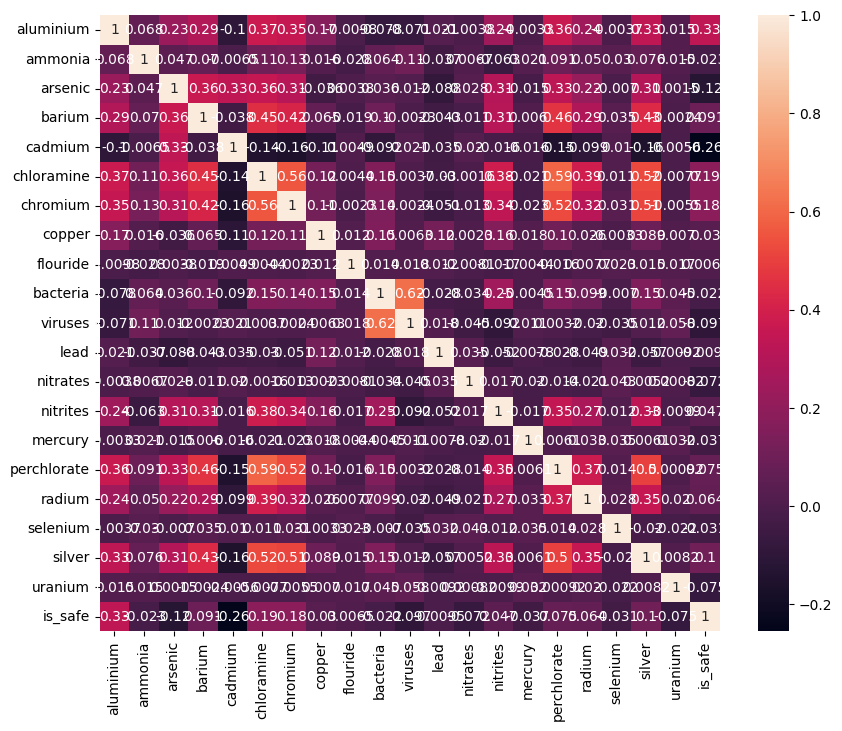

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

## MODELLING DATA

In [33]:
X = df.drop(columns='is_safe', axis=1)
Y = df['is_safe']

In [34]:
print(X)

      aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium   
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83  \
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7994       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7998       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  viruses   lead  nitrates  nitrites  mercury   
0     

In [35]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
7994    1
7995    1
7996    1
7997    1
7998    1
Name: is_safe, Length: 7999, dtype: int64


## Pisahkan data training dan data testing

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=4)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(7999, 20) (6399, 20) (1600, 20)


## Membuat model training

In [38]:

model = LogisticRegression()

In [39]:
model.fit(X_train, Y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## EVALUASI MODEL

In [40]:

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score (X_train_prediction, Y_train)

In [41]:
print('Akurasi data training :', training_data_accuracy)

Akurasi data training : 0.9006094702297234


In [42]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [43]:
print('Akurasi data testing :', test_data_accuracy)

Akurasi data testing : 0.90125


## Model prediksi

In [44]:
input_data = (1.77,20.46,0.02,3.79,0.001,7.18,0.49,1.16,0.4,0.25,0.002,0.09,5.38,1.72,0.01,3.49,5.83,0.1,0.24,0.04)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('Kualitas Air Tidak Aman')
else:
    print('Kualitas Air Aman')

[1]
Kualitas Air Aman


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [47]:
input_data = (3.93, 19.87, 0.04, 0.66, 0.001, 6.22, 0.1, 1.86, 0.86, 0.16, 0.005, 0.197, 13.65, 1.81, 0.001, 53.35, 7.24, 0.08, 0.08, 0.07)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('Kualitas Air Tidak Aman')
else:
    print('Kualitas Air Aman')

[0]
Kualitas Tidak Aman


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## DEPLOYMENT

## Simpan Model

In [45]:
import pickle

In [46]:
filename = 'waterQuality.sav'
pickle.dump(model, open(filename, 'wb'))